In [1]:
import os
from PIL import Image
from itertools import product
import matplotlib.pyplot as plt

In [2]:
pip install PIL

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement PIL
ERROR: No matching distribution found for PIL


In [3]:
dict1 = {
    1: 'A',
    2: 'B',
    3: 'C',
    4: 'D',
    5: 'E',
    6: 'F',
    7: 'G',
    8: 'H',
    9: 'I',
    10: 'J',
    11: 'K',
    12: 'L',
    13: 'M',
    14: 'N',
    15: 'O',
    16: 'P',
    17: 'Q',
    18: 'R',
    19: 'S',
    20: 'T',
    21: 'U',
    22: 'V',
    23: 'W',
    24: 'X',
    25: 'Y',
    26: 'Z',
    27: 'Ç',
    28: 'Ö',
    29: 'a',
    30: 'b',
    31: 'c',
    32: 'd',
    33: 'e',
    34: 'f',
    35: 'g',
    36: 'h',
    37: 'i',
    38: 'j',
    39: 'k',
    40: 'l',
    41: 'm',
    42: 'n',
    43: 'o',
    44: 'p',
    45: 'q',
    46: 'r',
    47: 's',
    48: 't',
    49: 'u',
    50: 'v',
    51: 'w',
    52: 'x',
    53: 'y',
    54: 'z',
    55: 'ç',
    56:'ö'
}


In [42]:
dict2 = {
    1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J', 
    11: 'K', 12: 'L', 13: 'M', 14: 'N', 15: 'O', 16: 'P', 17: 'Q', 18: 'R', 19: 'S', 
    20: 'T', 21: 'U', 22: 'V', 23: 'W', 24: 'X', 25: 'Y', 26: 'Z', 27: 'Ç', 28: 'Ö', 
    29: 'Ğ', 30: 'Ü', 31: 'Ş', 32: 'Ğ', 33: 'Ü', 34: 'Ş',
    35: ' ',
    36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 
    45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 
    54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z', 62: 'ç', 
    63: 'ö', 64: 'ğ', 65: 'ü', 66: 'ş', 67: 'ğ', 68: 'ü', 69: 'ş',
    70: ' '
}


In [5]:
def tile(filename, dir_in, dir_out, name_dict):
    name, ext = os.path.splitext(filename)
    img = Image.open(os.path.join(dir_in, filename))

    # Determine the grid layout based on the file name
    if filename.endswith('.1.jpg'):
        rows, cols = 8, 7
        label_dict = dict1
    elif filename.endswith('.2.jpg'):
        rows, cols = 10, 7
        label_dict = dict2

    # Correct image orientation if necessary
    #img = correct_orientation(img)

    w, h = img.size
    os.makedirs(os.path.join(dir_out, name), exist_ok=True)

    # Calculate the size of each grid cell
    cell_w, cell_h = w // cols, h // rows

    count = 1  # Counter for dictionary keys
    for i in range(rows):
        for j in range(cols):
            # Calculate the box coordinates for cropping
            box = (j * cell_w + 50, i * cell_h + 50, (j + 1) * cell_w - 20, (i + 1) * cell_h - 20)

            if count in label_dict:
                label = label_dict[count]
                out = os.path.join(dir_out, name, f'{name}_{label}{ext}')
                img.crop(box).rotate(0, expand=True).save(out)
            count += 1

files = os.listdir('gorseller')
for i in files:
    print("File name:", i)
    tile(i, 'gorseller', 'bolunmus_gorseller', 300)

File name: 1.2.jpg
File name: 10.1.jpg
File name: 10.2.jpg
File name: 11.1.jpg


KeyboardInterrupt: 

In [6]:
def tile(filename, dir_in, dir_out, d, name_dict):
    name, ext = os.path.splitext(filename)
    img = Image.open(os.path.join(dir_in, filename))
    w, h = img.size
    os.makedirs(os.path.join(dir_out, name), exist_ok=True)
    grid = [(i, j) for i in range(0, h - h % d, d) for j in range(0, w - w % d, d)]
    count = 1  # Counter for dictionary keys
    for i, j in grid:
        box = (j + 50, i + 50, j + d - 20, i + d - 20)
        if count in name_dict:
            out = os.path.join(dir_out, name, f'{name}_{name_dict[count]}{ext}')  # Use dictionary value for file name
            img.crop(box).rotate(0, expand=True).save(out)
        count += 1

files = os.listdir('gorseller')

for file in files:
    if os.path.isfile(os.path.join('gorseller', file)):
        folder_dict = dict1 if file.endswith(('1.jpg', '2.jpg')) else dict2
        print("File name:", file)
        tile(file, 'gorseller', 'bolunmus_gorseller', 300, folder_dict)

FileNotFoundError: ignored

In [15]:
#bunu

from PIL import Image, ImageEnhance, ImageOps
def enhance_contrast_and_threshold(img, threshold=128):
    # Enhance contrast
    enhancer = ImageEnhance.Contrast(img)
    enhanced_img = enhancer.enhance(2.0)  # Adjust the factor as needed

    # Convert to grayscale and apply binary threshold
    bw = ImageOps.grayscale(enhanced_img)
    bw = bw.point(lambda p: p > threshold and 255)

    return bw

In [16]:
#bunu
def is_correct_orientation(img, is_front_page):
    a, b, c, d = 20, 20, 50, 50
    w=c-a
    h=d-b
    box = (a, b, c, d)
    top_left = img.crop(box)

    # Apply contrast enhancement and thresholding
    processed_top_left = enhance_contrast_and_threshold(top_left)

    plt.imshow(processed_top_left)
    plt.show()

    # Count black pixels
    black_pixels = sum(p < 128 for p in processed_top_left.getdata())
    print("Black pixels:", black_pixels)

    if black_pixels < 50:  # Define this threshold based on experimentation
        img = img.rotate(90, expand=1)
        return is_correct_orientation(img, is_front_page)
    else:
        return img

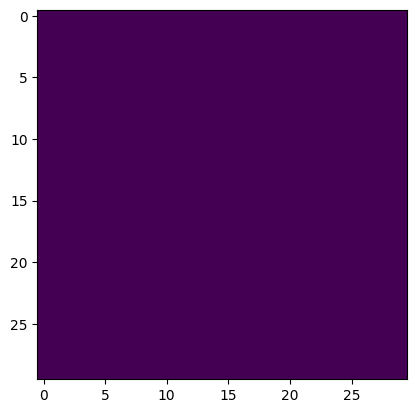

Black pixels: 0


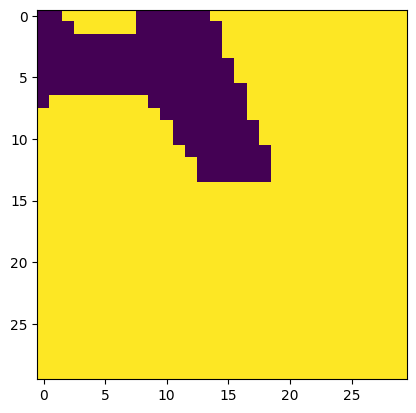

Black pixels: 146


In [93]:
#bunu
filename="5.1.jpg"
img = Image.open(filename)
is_front_page = filename.endswith('.1.jpg')
img=is_correct_orientation(img,is_front_page)

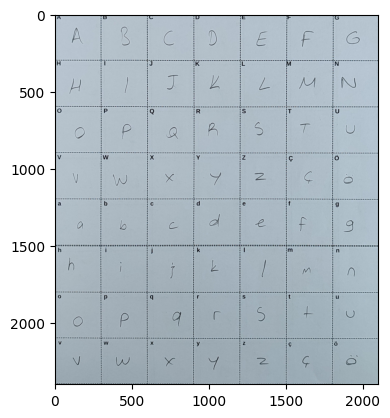

In [94]:
plt.imshow(img)

File name: 1.1.jpg


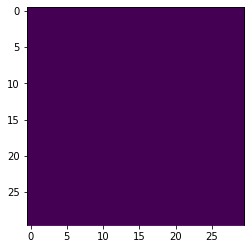

Black pixels: 0


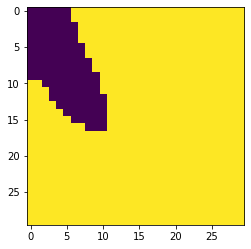

Black pixels: 121
File name: 1.2.jpg


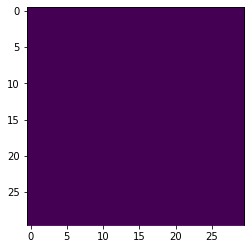

Black pixels: 0


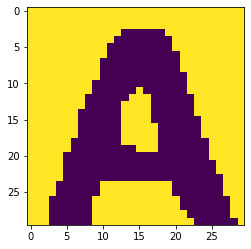

Black pixels: 354
File name: 10.1.jpg


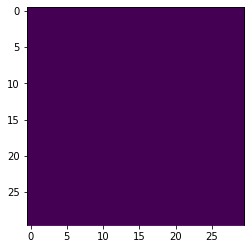

Black pixels: 0


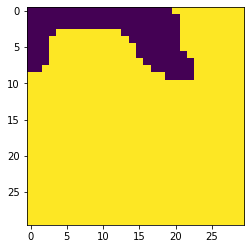

Black pixels: 125
File name: 10.2.jpg


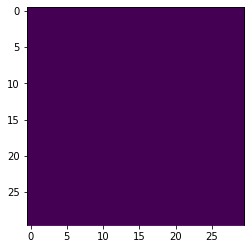

Black pixels: 0


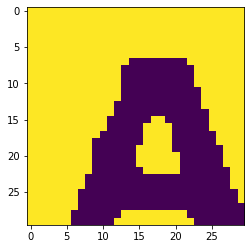

Black pixels: 318
File name: 11.1.jpg


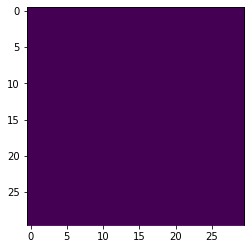

Black pixels: 0


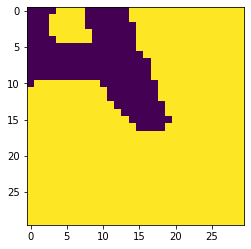

Black pixels: 176
File name: 12.1.jpg


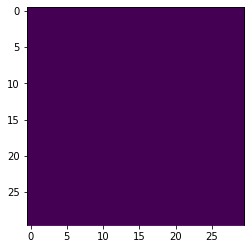

Black pixels: 0


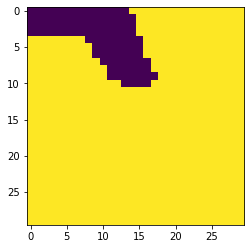

Black pixels: 105
File name: 12.2.jpg


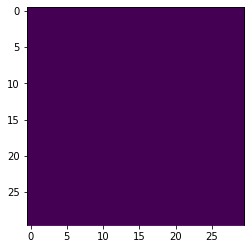

Black pixels: 0


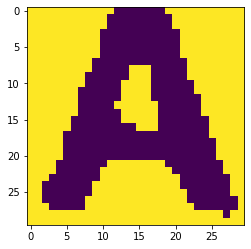

Black pixels: 369
File name: 13.1.jpg


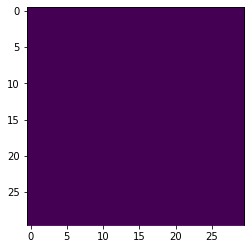

Black pixels: 0


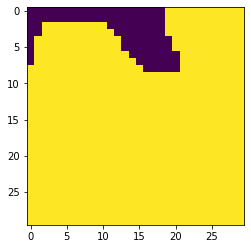

Black pixels: 93
File name: 13.2.jpg


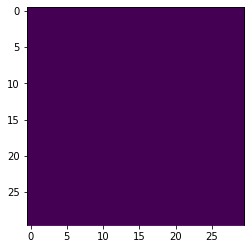

Black pixels: 0


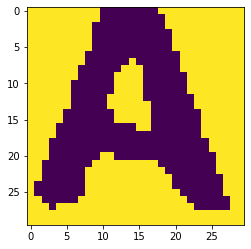

Black pixels: 370
File name: 14.1.jpg


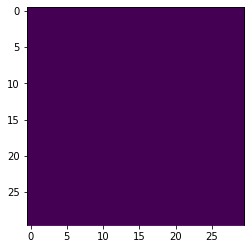

Black pixels: 0


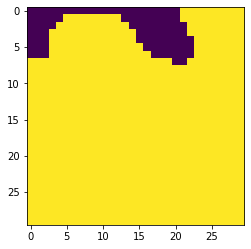

Black pixels: 88
File name: 14.2.jpg


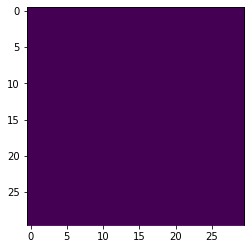

Black pixels: 0


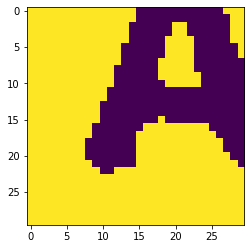

Black pixels: 290
File name: 15.1.jpg


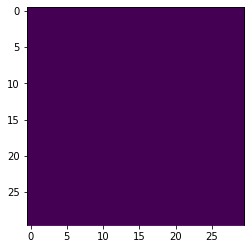

Black pixels: 0


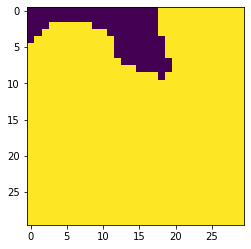

Black pixels: 92
File name: 15.2.jpg


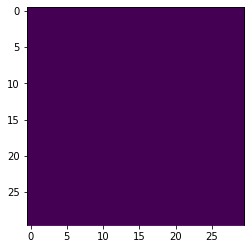

Black pixels: 0


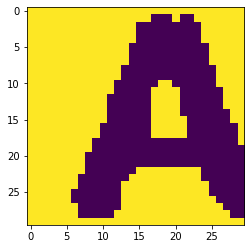

Black pixels: 352
File name: 16.1.jpg


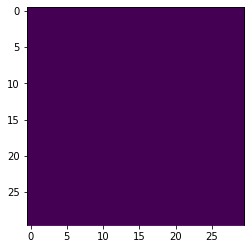

Black pixels: 0


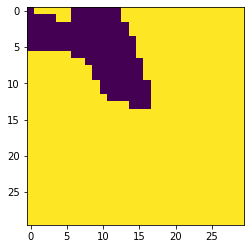

Black pixels: 131
File name: 16.2.jpg


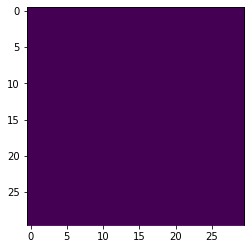

Black pixels: 0


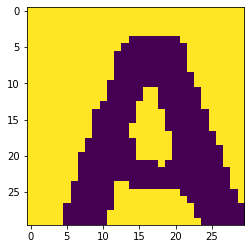

Black pixels: 337
File name: 17.1.jpg


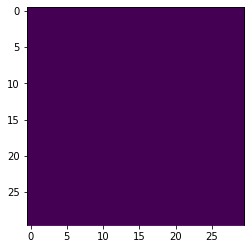

Black pixels: 0


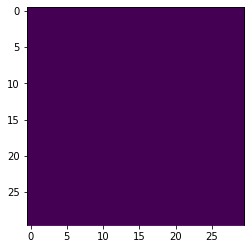

Black pixels: 0


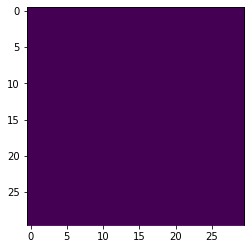

Black pixels: 0


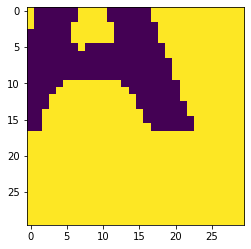

Black pixels: 224
File name: 17.2.jpg


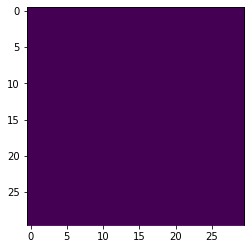

Black pixels: 0


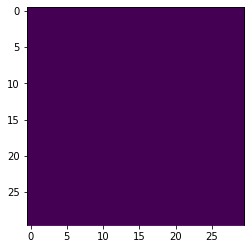

Black pixels: 0


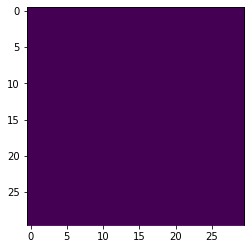

Black pixels: 0


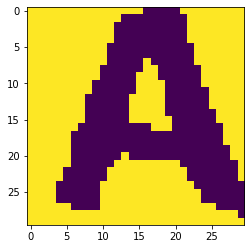

Black pixels: 362
File name: 18.1.jpg


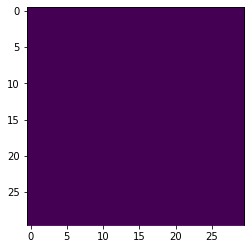

Black pixels: 0


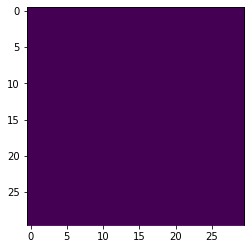

Black pixels: 0


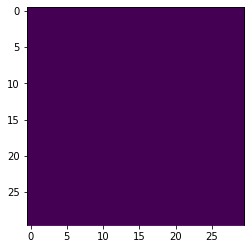

Black pixels: 0


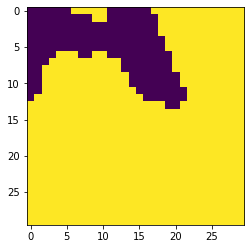

Black pixels: 172
File name: 18.2.jpg


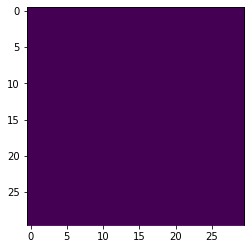

Black pixels: 0


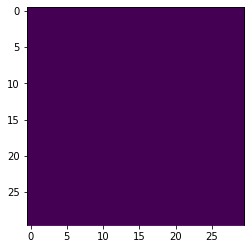

Black pixels: 0


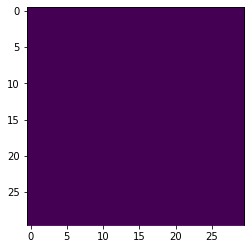

Black pixels: 0


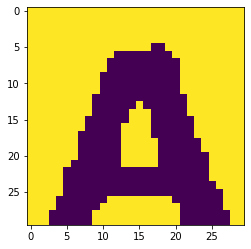

Black pixels: 319
File name: 19.1.jpg


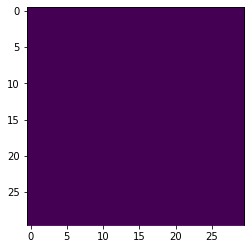

Black pixels: 0


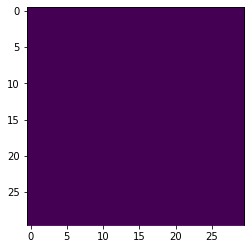

Black pixels: 0


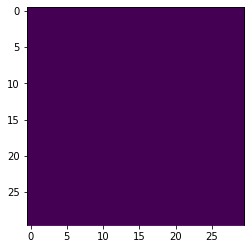

Black pixels: 0


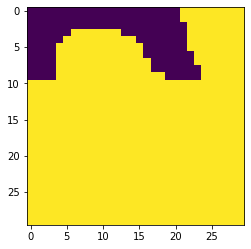

Black pixels: 142
File name: 19.2.jpg


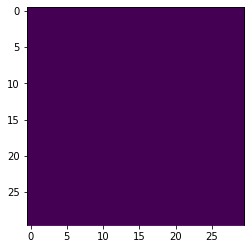

Black pixels: 0


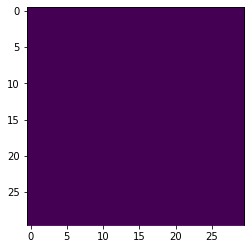

Black pixels: 0


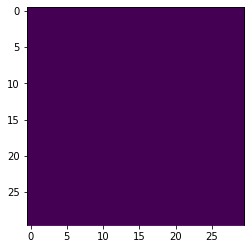

Black pixels: 0


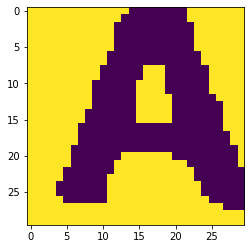

Black pixels: 369
File name: 2.1.jpg


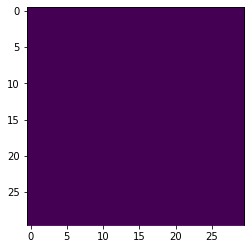

Black pixels: 0


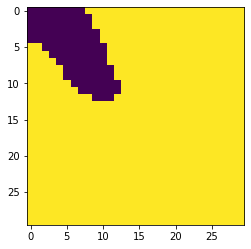

Black pixels: 100
File name: 2.2.jpg


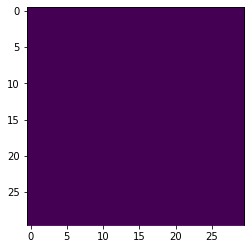

Black pixels: 0


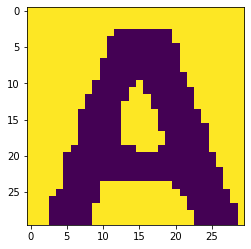

Black pixels: 356
File name: 20.1.jpg


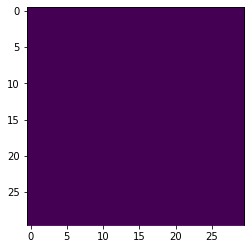

Black pixels: 0


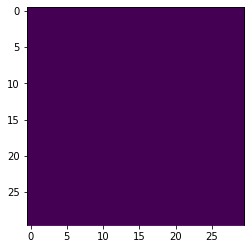

Black pixels: 0


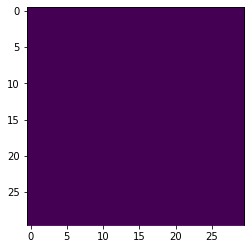

Black pixels: 0


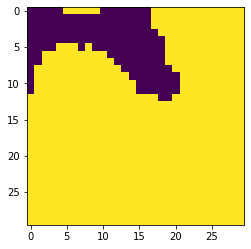

Black pixels: 149
File name: 20.2.jpg


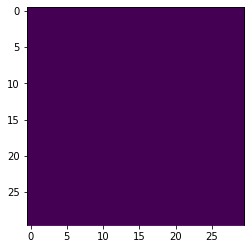

Black pixels: 0


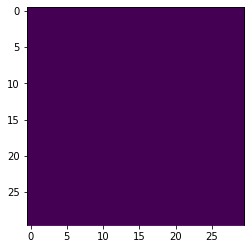

Black pixels: 0


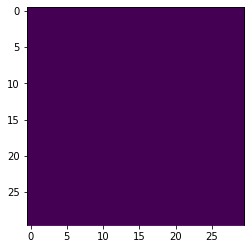

Black pixels: 0


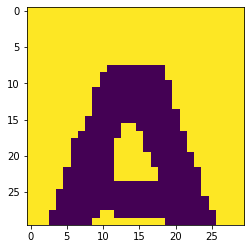

Black pixels: 297
File name: 21.1.jpg


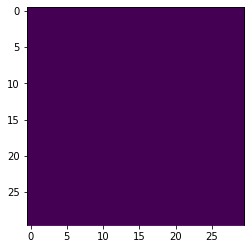

Black pixels: 0


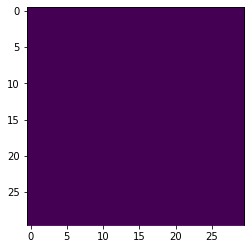

Black pixels: 0


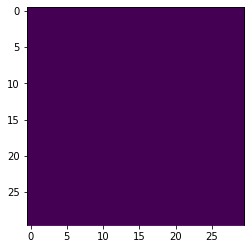

Black pixels: 0


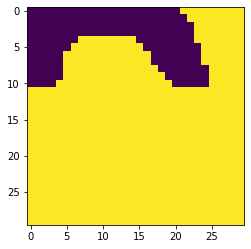

Black pixels: 174
File name: 21.2.jpg


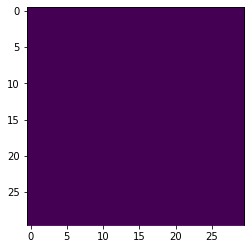

Black pixels: 0


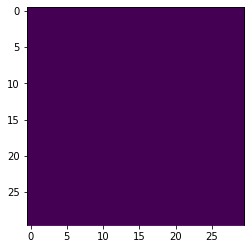

Black pixels: 0


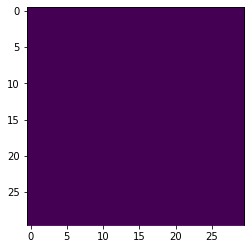

Black pixels: 0


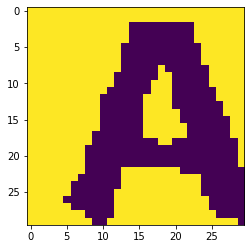

Black pixels: 345
File name: 22.1.jpg


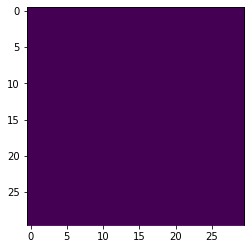

Black pixels: 0


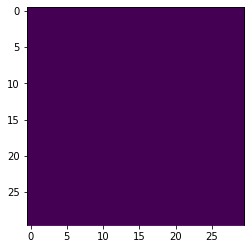

Black pixels: 0


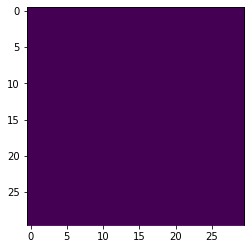

Black pixels: 0


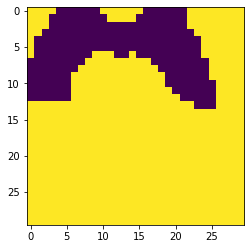

Black pixels: 213
File name: 22.2.jpg


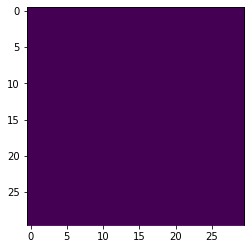

Black pixels: 0


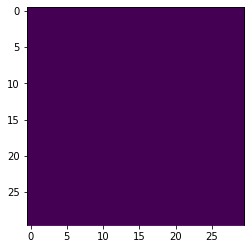

Black pixels: 0


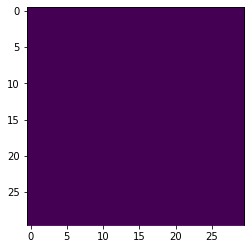

Black pixels: 0


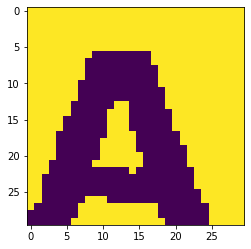

Black pixels: 321
File name: 23.1.jpg


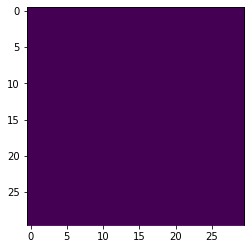

Black pixels: 0


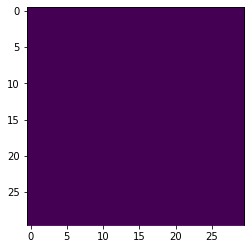

Black pixels: 0


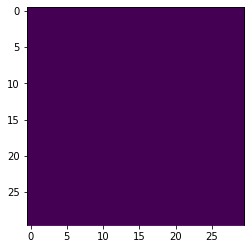

Black pixels: 0


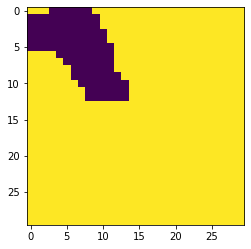

Black pixels: 107
File name: 23.2.jpg


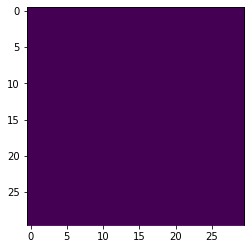

Black pixels: 0


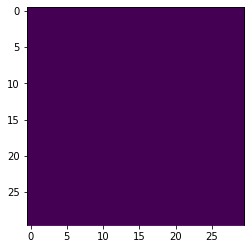

Black pixels: 0


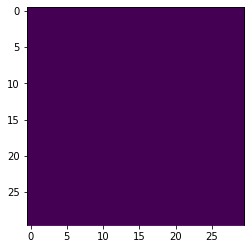

Black pixels: 0


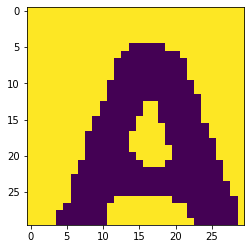

Black pixels: 335
File name: 24.1.jpg


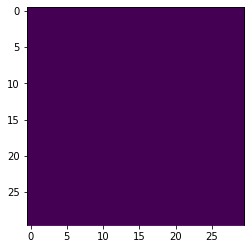

Black pixels: 0


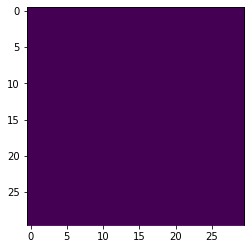

Black pixels: 0


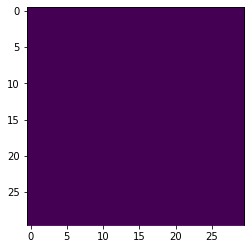

Black pixels: 0


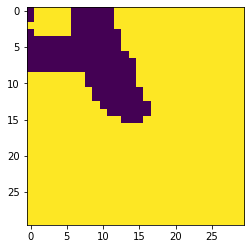

Black pixels: 142
File name: 24.2.jpg


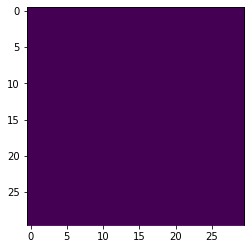

Black pixels: 0


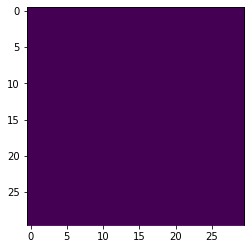

Black pixels: 0


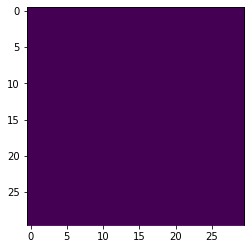

Black pixels: 0


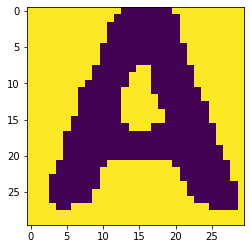

Black pixels: 370
File name: 25.1.jpg


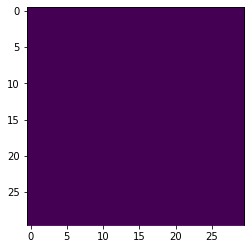

Black pixels: 0


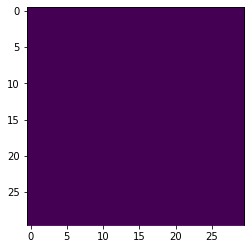

Black pixels: 0


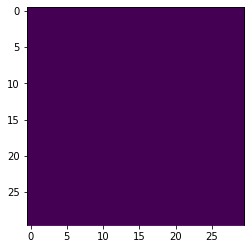

Black pixels: 0


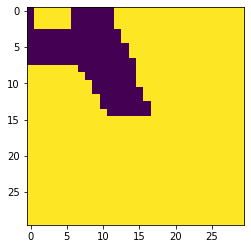

Black pixels: 137
File name: 25.2.jpg


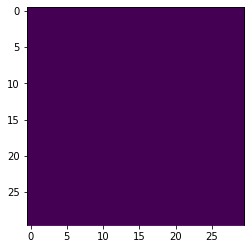

Black pixels: 0


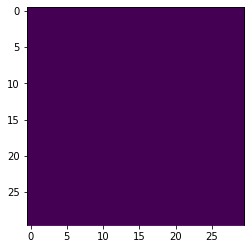

Black pixels: 0


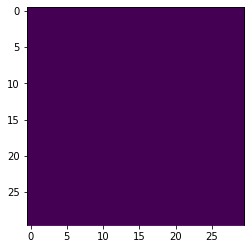

Black pixels: 0


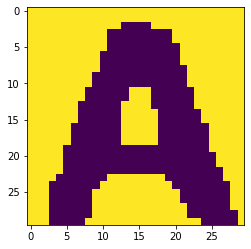

Black pixels: 369
File name: 26.1.jpg


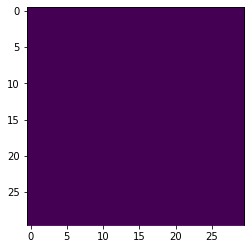

Black pixels: 0


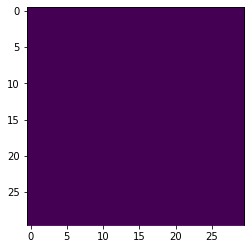

Black pixels: 0


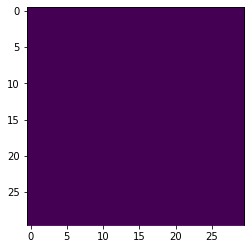

Black pixels: 0


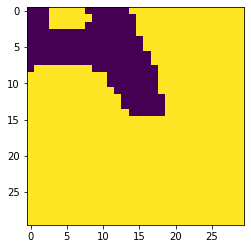

Black pixels: 156
File name: 26.2.jpg


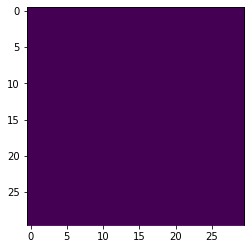

Black pixels: 0


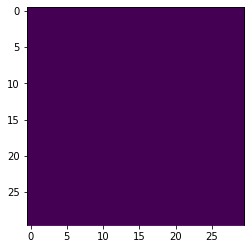

Black pixels: 0


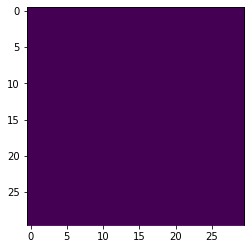

Black pixels: 0


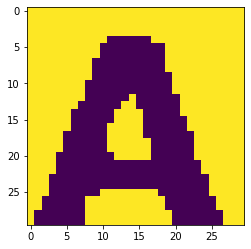

Black pixels: 340
File name: 27.1.jpg


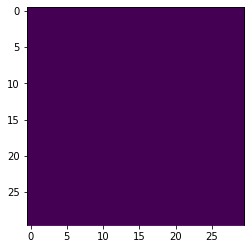

Black pixels: 0


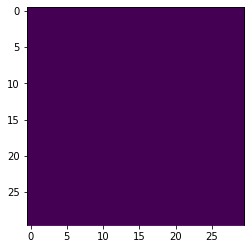

Black pixels: 0


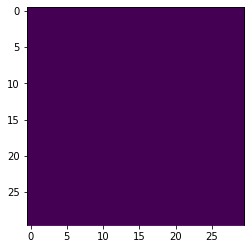

Black pixels: 0


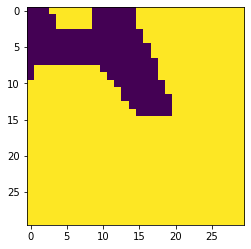

Black pixels: 161
File name: 27.2.jpg


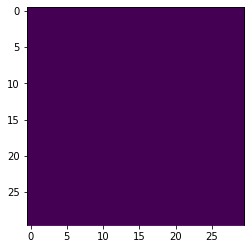

Black pixels: 0


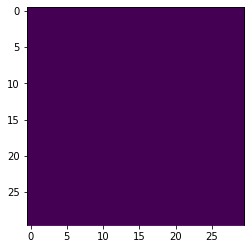

Black pixels: 0


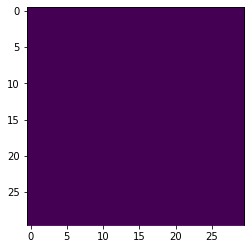

Black pixels: 0


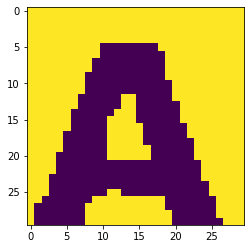

Black pixels: 337
File name: 28.2.jpg


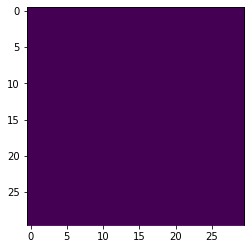

Black pixels: 0


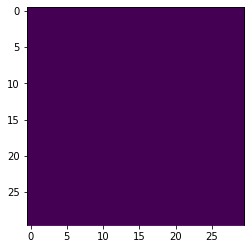

Black pixels: 0


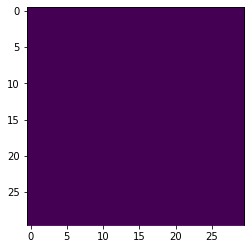

Black pixels: 0


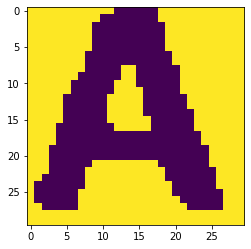

Black pixels: 357
File name: 29.1.jpg


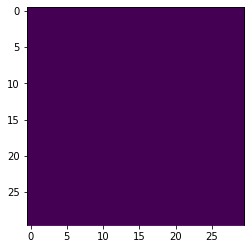

Black pixels: 0


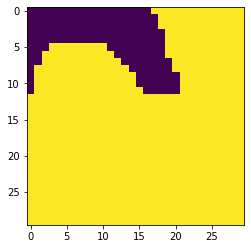

Black pixels: 147
File name: 29.2.jpg


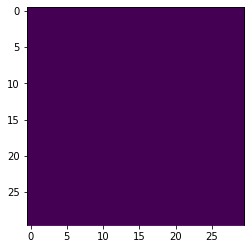

Black pixels: 0


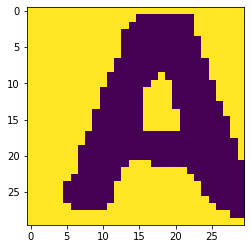

Black pixels: 371
File name: 3.1.jpg


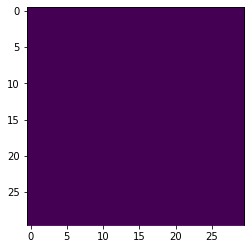

Black pixels: 0


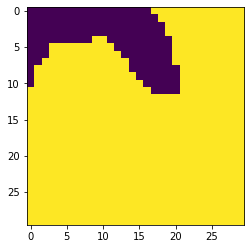

Black pixels: 145
File name: 3.2.jpg


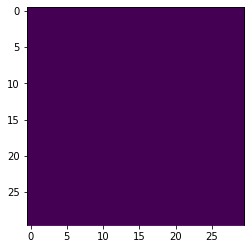

Black pixels: 0


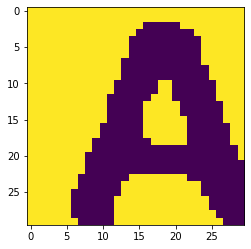

Black pixels: 349
File name: 30.1.jpg


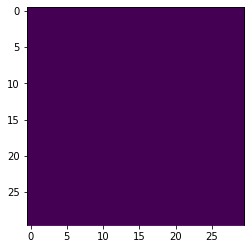

Black pixels: 0


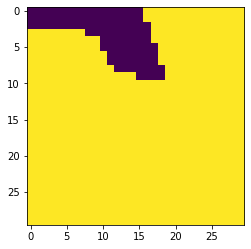

Black pixels: 98
File name: 30.2.jpg


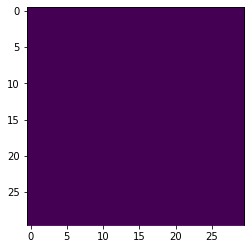

Black pixels: 0


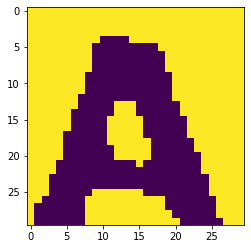

Black pixels: 339
File name: 31.1.jpg


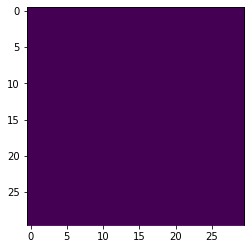

Black pixels: 0


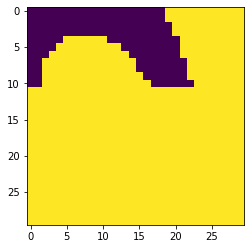

Black pixels: 149
File name: 31.2.jpg


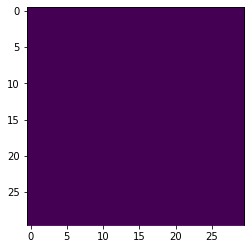

Black pixels: 0


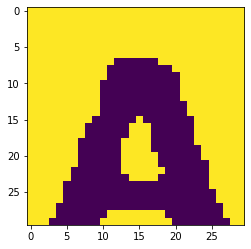

Black pixels: 312
File name: 32.1.jpg


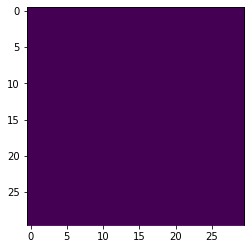

Black pixels: 0


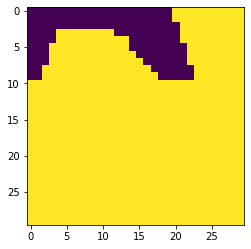

Black pixels: 130
File name: 32.2.jpg


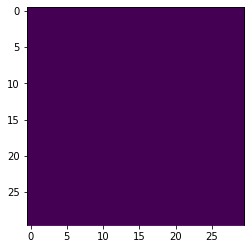

Black pixels: 0


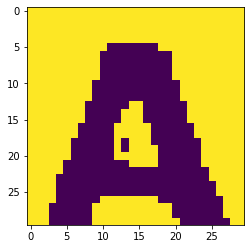

Black pixels: 332
File name: 33.1.jpg


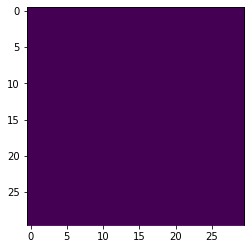

Black pixels: 0


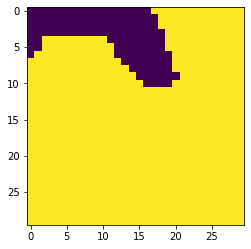

Black pixels: 123
File name: 33.2.jpg


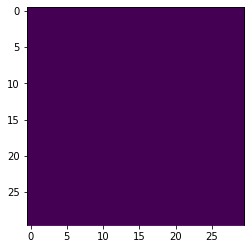

Black pixels: 0


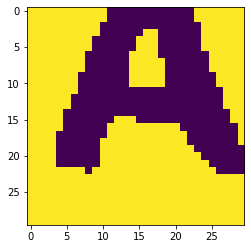

Black pixels: 326
File name: 34.1.jpg


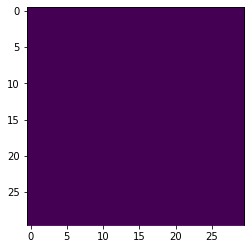

Black pixels: 0


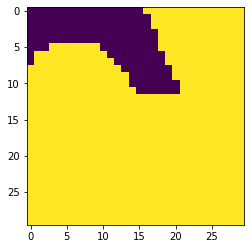

Black pixels: 140
File name: 34.2.jpg


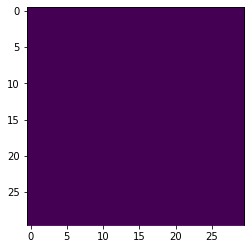

Black pixels: 0


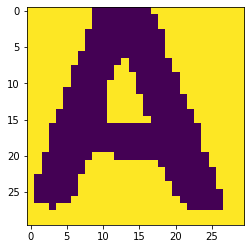

Black pixels: 366
File name: 35.1.jpg


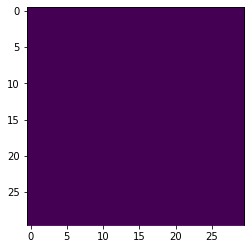

Black pixels: 0


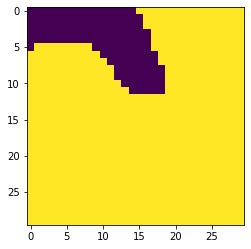

Black pixels: 130
File name: 35.2.jpg


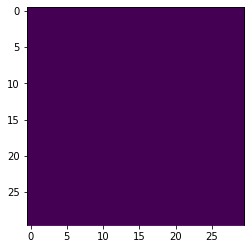

Black pixels: 0


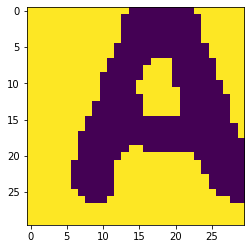

Black pixels: 358
File name: 36.1.jpg


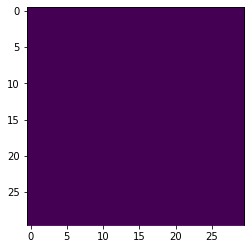

Black pixels: 0


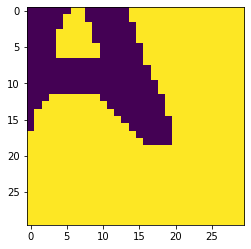

Black pixels: 214
File name: 36.2.jpg


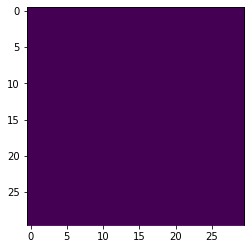

Black pixels: 0


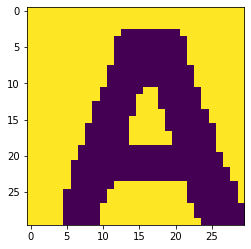

Black pixels: 357
File name: 37.1.jpg


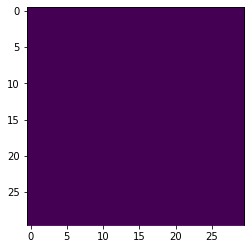

Black pixels: 0


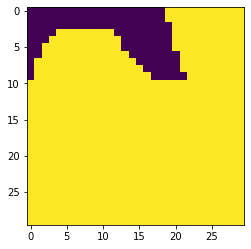

Black pixels: 117
File name: 37.2.jpg


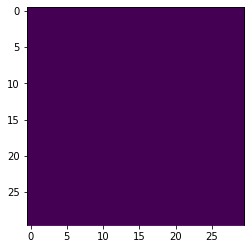

Black pixels: 0


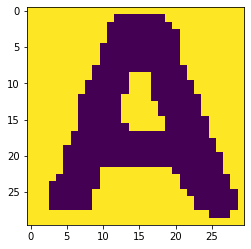

Black pixels: 361
File name: 38.1.jpg


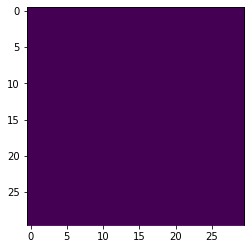

Black pixels: 0


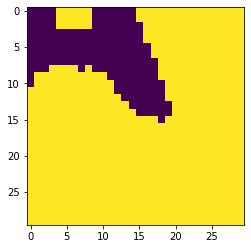

Black pixels: 169
File name: 38.2.jpg


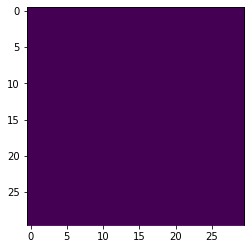

Black pixels: 0


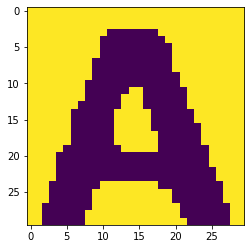

Black pixels: 361
File name: 39.1.jpg


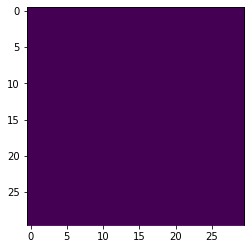

Black pixels: 0


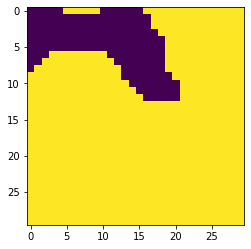

Black pixels: 153
File name: 39.2.jpg


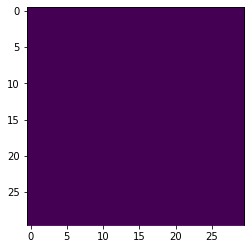

Black pixels: 0


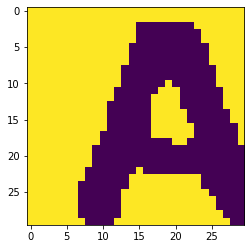

Black pixels: 353
File name: 4.1.jpg


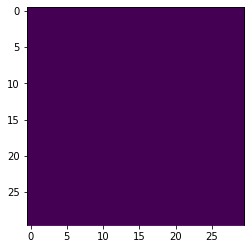

Black pixels: 0


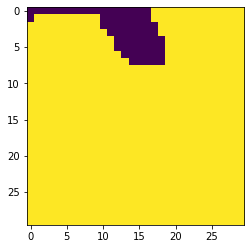

Black pixels: 65
File name: 4.2.jpg


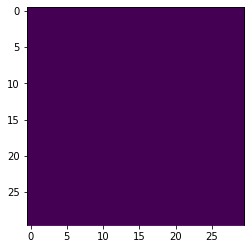

Black pixels: 0


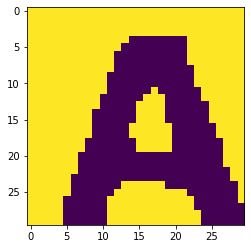

Black pixels: 342
File name: 40.1.jpg


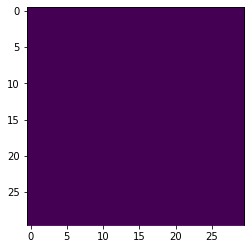

Black pixels: 0


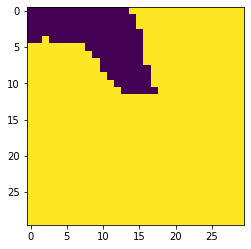

Black pixels: 119
File name: 40.2.jpg


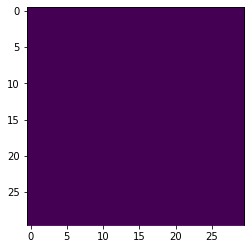

Black pixels: 0


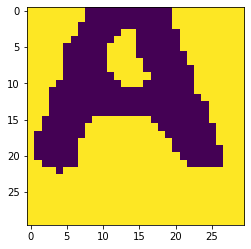

Black pixels: 316
File name: 41.1.jpg


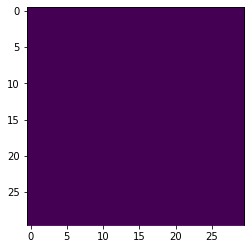

Black pixels: 0


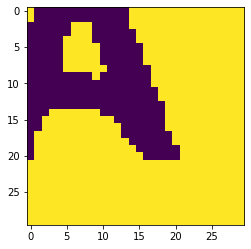

Black pixels: 249
File name: 41.2.jpg


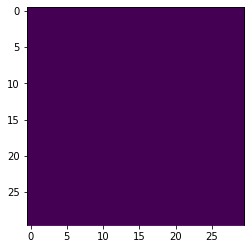

Black pixels: 0


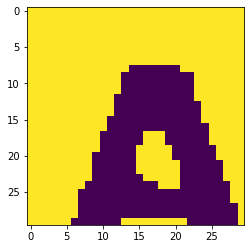

Black pixels: 300
File name: 42.1.jpg


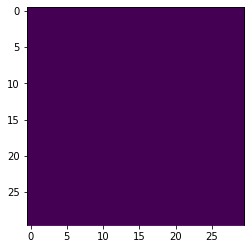

Black pixels: 0


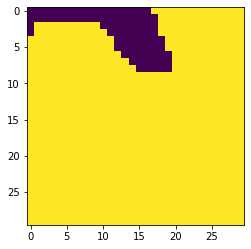

Black pixels: 84
File name: 42.2.jpg


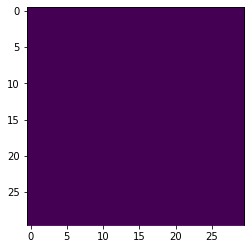

Black pixels: 0


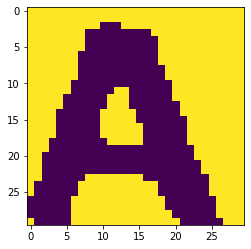

Black pixels: 367
File name: 43.1.jpg


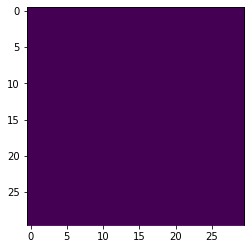

Black pixels: 0


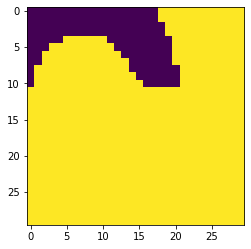

Black pixels: 137
File name: 43.2.jpg


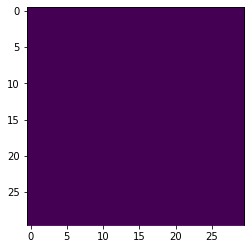

Black pixels: 0


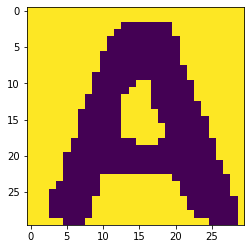

Black pixels: 364
File name: 44.1.jpg


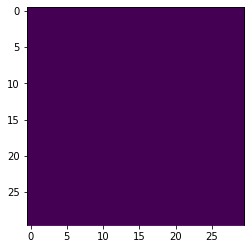

Black pixels: 0


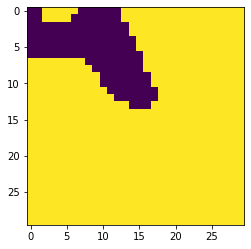

Black pixels: 136
File name: 44.2.jpg


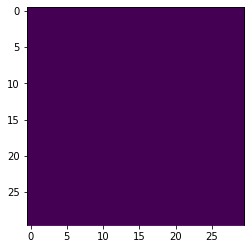

Black pixels: 0


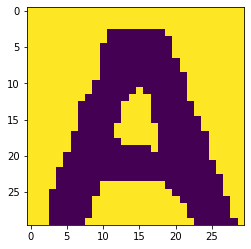

Black pixels: 362
File name: 45.1.jpg


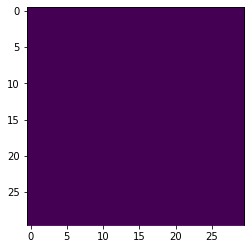

Black pixels: 0


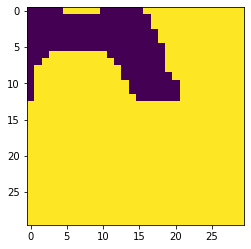

Black pixels: 158
File name: 45.2.jpg


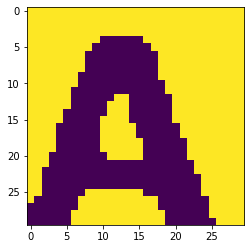

Black pixels: 339
File name: 46.1.jpg


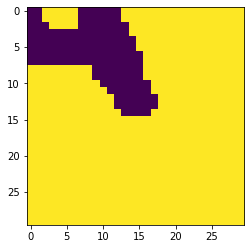

Black pixels: 145
File name: 46.2.jpg


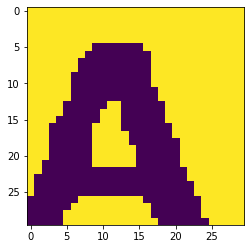

Black pixels: 329
File name: 47.1.jpg


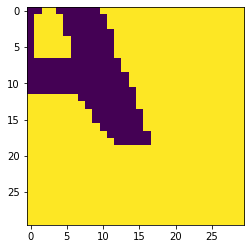

Black pixels: 166
File name: 47.2.jpg


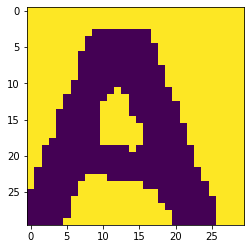

Black pixels: 369
File name: 48.1.jpg


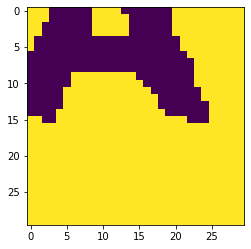

Black pixels: 236
File name: 48.2.jpg


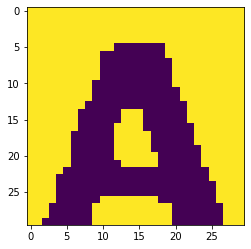

Black pixels: 332
File name: 49.1.jpg


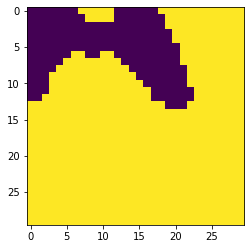

Black pixels: 189
File name: 49.2.jpg


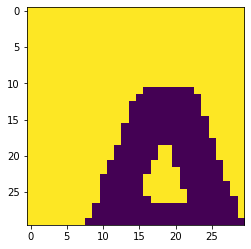

Black pixels: 246
File name: 5.1.jpg


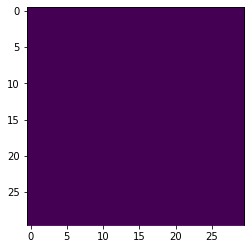

Black pixels: 0


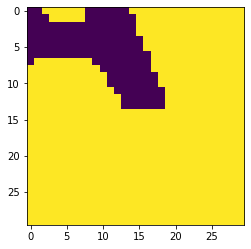

Black pixels: 146
File name: 5.2.jpg


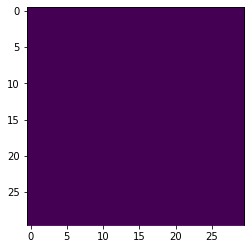

Black pixels: 0


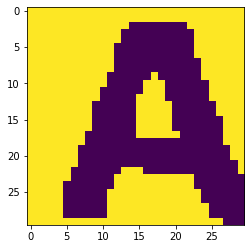

Black pixels: 362
File name: 50.1.jpg


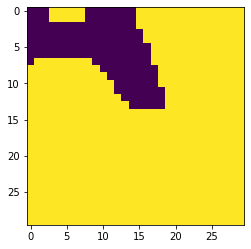

Black pixels: 149
File name: 50.2.jpg


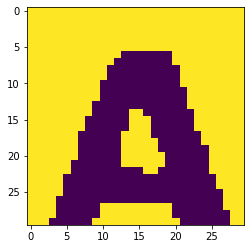

Black pixels: 326
File name: 51.1.jpg


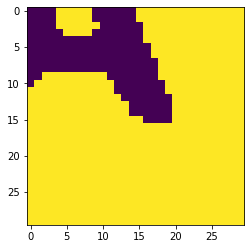

Black pixels: 175
File name: 51.2.jpg


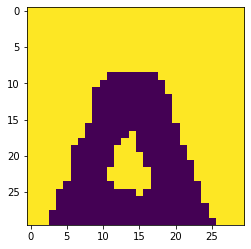

Black pixels: 286
File name: 52.1.jpg


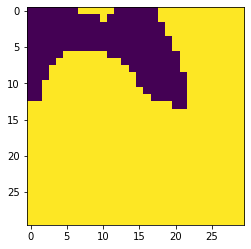

Black pixels: 181
File name: 52.2.jpg


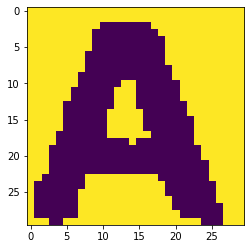

Black pixels: 370
File name: 53.1.jpg


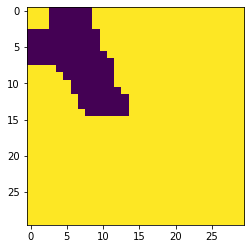

Black pixels: 119
File name: 53.2.jpg


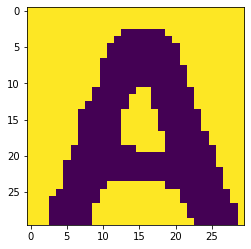

Black pixels: 356
File name: 54.1.jpg


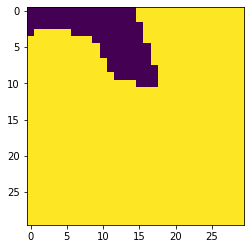

Black pixels: 100
File name: 54.2.jpg


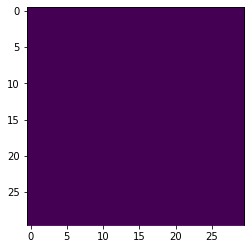

Black pixels: 0


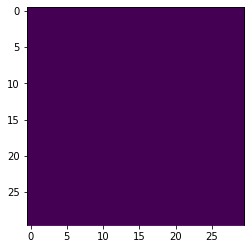

Black pixels: 0


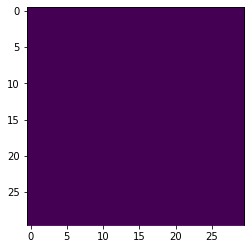

Black pixels: 0


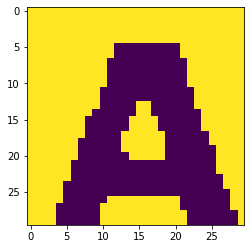

Black pixels: 344
File name: 55.1.jpg


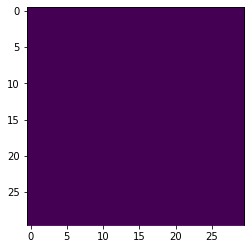

Black pixels: 0


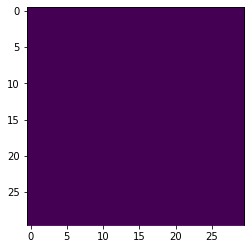

Black pixels: 0


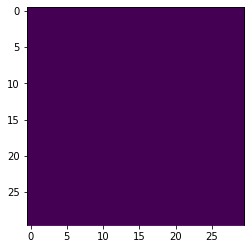

Black pixels: 0


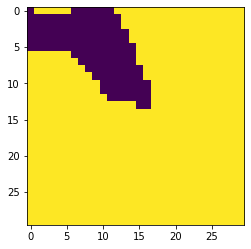

Black pixels: 130
File name: 55.2.jpg


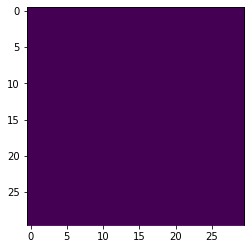

Black pixels: 0


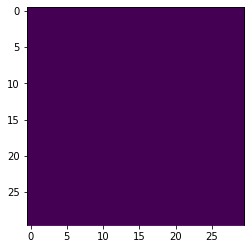

Black pixels: 0


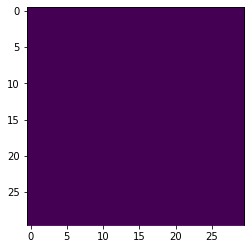

Black pixels: 0


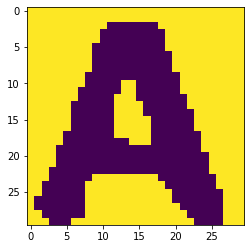

Black pixels: 364
File name: 56.1.jpg


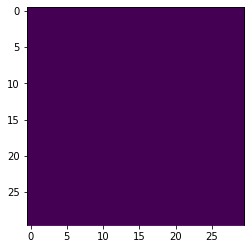

Black pixels: 0


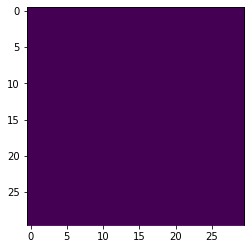

Black pixels: 0


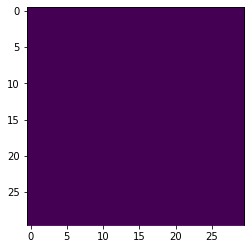

Black pixels: 0


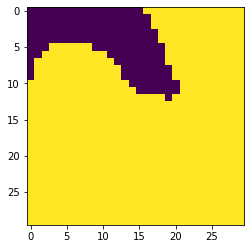

Black pixels: 147
File name: 56.2.jpg


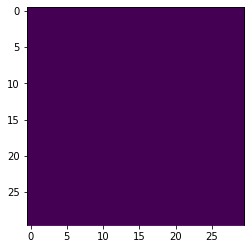

Black pixels: 0


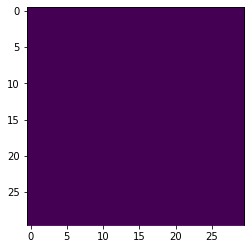

Black pixels: 0


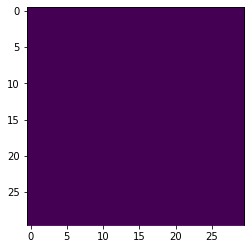

Black pixels: 0


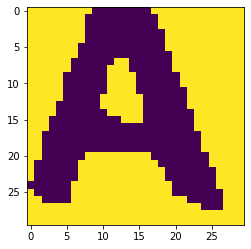

Black pixels: 364
File name: 6.1.jpg


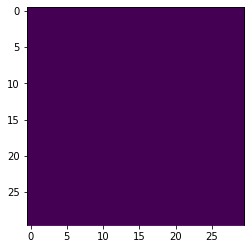

Black pixels: 0


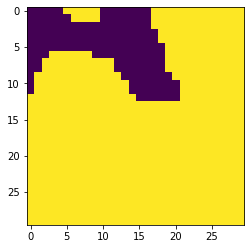

Black pixels: 158
File name: 6.2.jpg


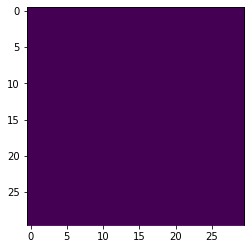

Black pixels: 0


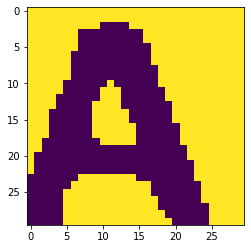

Black pixels: 356
File name: 7.1.jpg


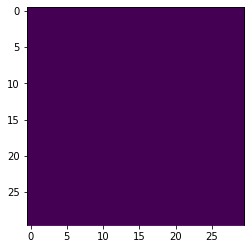

Black pixels: 0


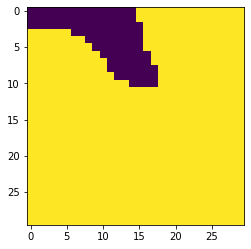

Black pixels: 101
File name: 7.2.jpg


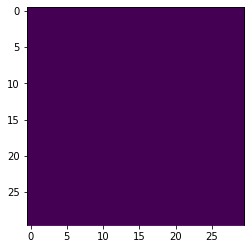

Black pixels: 0


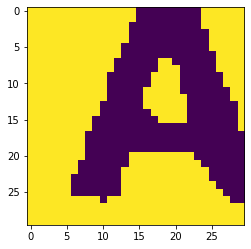

Black pixels: 347
File name: 8.1.jpg


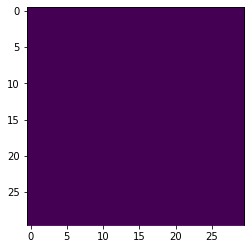

Black pixels: 0


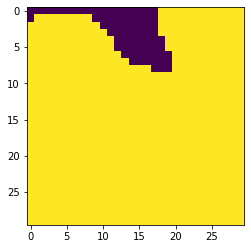

Black pixels: 73
File name: 8.2.jpg


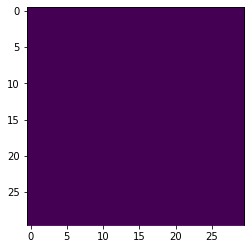

Black pixels: 0


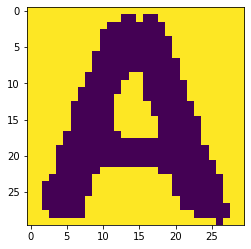

Black pixels: 357
File name: 9.1.jpg


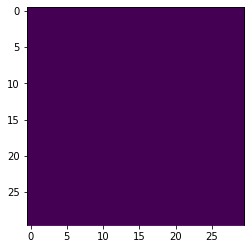

Black pixels: 0


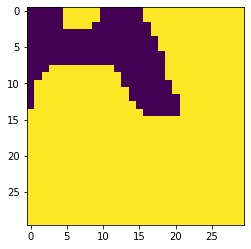

Black pixels: 179
File name: 9.2.jpg


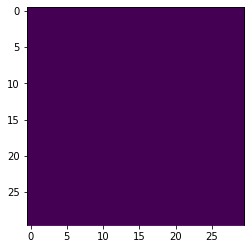

Black pixels: 0


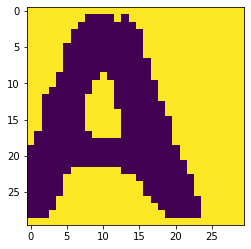

Black pixels: 356


In [17]:
files = os.listdir('gorseller')

for file in files:
    if file.endswith('.jpg'):
        is_front_page = file.endswith('1.jpg')
        file_path = os.path.join("gorseller", file)
        img = Image.open(file_path)
        print("File name:", file)
        img = is_correct_orientation(img, is_front_page)
        img.save(file_path)

In [43]:
def tile(filename, dir_in, dir_out, d, name_dict):
    name, ext = os.path.splitext(filename)
    img = Image.open(os.path.join(dir_in, filename))
    w, h = img.size
    os.makedirs(os.path.join(dir_out, name), exist_ok=True)
    grid = [(i, j) for i in range(0, h - h % d, d) for j in range(0, w - w % d, d)]
    count = 1  # Counter for dictionary keys
    for i, j in grid:
        box = (j + 50, i + 50, j + d - 20, i + d - 20)
        if count in name_dict:
            out = os.path.join(dir_out, name, f'{name}_{name_dict[count]}{ext}')  # Use dictionary value for file name
            img.crop(box).rotate(0, expand=True).save(out)
        count += 1

files = os.listdir('gorseller')

for file in files:
    if os.path.isfile(os.path.join('gorseller', file)):
        folder_dict = dict1 if file.endswith(('1.jpg', '2.jpg')) else dict2
        print("File name:", file)
        tile(file, 'gorseller', 'bolunmus_gorseller', 300, folder_dict)

File name: 1.1.jpg
File name: 1.2.jpg
File name: 10.1.jpg
File name: 10.2.jpg
File name: 11.1.jpg
File name: 12.1.jpg


KeyboardInterrupt: 

In [41]:
dict2

{1: 'A',
 2: 'B',
 3: 'C',
 4: 'D',
 5: 'E',
 6: 'F',
 7: 'G',
 8: 'H',
 9: 'I',
 10: 'J',
 11: 'K',
 12: 'L',
 13: 'M',
 14: 'N',
 15: 'O',
 16: 'P',
 17: 'Q',
 18: 'R',
 19: 'S',
 20: 'T',
 21: 'U',
 22: 'V',
 23: 'W',
 24: 'X',
 25: 'Y',
 26: 'Z',
 27: 'Ç',
 28: 'Ö',
 29: 'Ğ',
 30: 'Ü',
 31: 'Ş',
 32: 'Ğ',
 33: 'Ü',
 34: 'Ş',
 35: 'a',
 36: 'b',
 37: 'c',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'i',
 44: 'j',
 45: 'k',
 46: 'l',
 47: 'm',
 48: 'n',
 49: 'o',
 50: 'p',
 51: 'q',
 52: 'r',
 53: 's',
 54: 't',
 55: 'u',
 56: 'v',
 57: 'w',
 58: 'x',
 59: 'y',
 60: 'z',
 61: 'ç',
 62: 'ö',
 63: 'ğ',
 64: 'ü',
 65: 'ş',
 66: 'ğ',
 67: 'ü',
 68: 'ş'}

In [ ]:
def tile(filename, dir_in, dir_out, name_dict):
    main_name = filename.split('.')[0]
    name, ext = os.path.splitext(filename)
    img = Image.open(os.path.join(dir_in, filename))

    # Determine the grid layout based on the file name
    if '.1.' in filename:
        rows, cols = 8, 7
        label_dict = dict1
    elif '.2.' in filename:
        rows, cols = 10, 7
        label_dict = dict2
    else:
        print(f"File {filename} does not match expected format.")
        return  # Skip this file

    w, h = img.size
    os.makedirs(os.path.join(dir_out, main_name), exist_ok=True)

    cell_w, cell_h = w // cols, h // rows

    count = 1
    for i in range(rows):
        for j in range(cols):
            box = (j * cell_w + 50, i * cell_h + 50, (j + 1) * cell_w - 20, (i + 1) * cell_h - 20)

            if count in label_dict:
                label = label_dict[count]
                out = os.path.join(dir_out, main_name, f'{name}_{label}_{count}{ext}')
                img.crop(box).rotate(0, expand=True).save(out)
            count += 1

files = os.listdir('gorseller')
for i in files:
    print("File name:", i)
    tile(i, 'gorseller', 'bolunmus_gorseller', 300)


File name: 1.1.jpg
File name: 1.2.jpg
File name: 10.1.jpg
File name: 10.2.jpg
File name: 11.1.jpg
File name: 12.1.jpg
File name: 12.2.jpg
File name: 13.1.jpg
File name: 13.2.jpg
File name: 14.1.jpg
File name: 14.2.jpg
File name: 15.1.jpg
File name: 15.2.jpg
File name: 16.1.jpg
File name: 16.2.jpg
File name: 17.1.jpg
File name: 17.2.jpg
File name: 18.1.jpg
File name: 18.2.jpg
File name: 19.1.jpg
File name: 19.2.jpg
File name: 2.1.jpg
File name: 2.2.jpg
File name: 20.1.jpg
File name: 20.2.jpg
File name: 21.1.jpg
File name: 21.2.jpg
File name: 22.1.jpg
File name: 22.2.jpg
File name: 23.1.jpg
File name: 23.2.jpg
File name: 24.1.jpg
File name: 24.2.jpg
File name: 25.1.jpg
File name: 25.2.jpg
File name: 26.1.jpg
File name: 26.2.jpg
File name: 27.1.jpg
File name: 27.2.jpg
File name: 28.1.jpeg
File name: 28.2.jpg
File name: 29.1.jpg
File name: 29.2.jpg
File name: 3.1.jpg
File name: 3.2.jpg
File name: 30.1.jpg
File name: 30.2.jpg
File name: 31.1.jpg
File name: 31.2.jpg
File name: 32.1.jpg
File 

In [26]:
dict1

{1: 'A',
 2: 'B',
 3: 'C',
 4: 'D',
 5: 'E',
 6: 'F',
 7: 'G',
 8: 'H',
 9: 'I',
 10: 'J',
 11: 'K',
 12: 'L',
 13: 'M',
 14: 'N',
 15: 'O',
 16: 'P',
 17: 'Q',
 18: 'R',
 19: 'S',
 20: 'T',
 21: 'U',
 22: 'V',
 23: 'W',
 24: 'X',
 25: 'Y',
 26: 'Z',
 27: 'Ç',
 28: 'Ö',
 29: 'a',
 30: 'b',
 31: 'c',
 32: 'd',
 33: 'e',
 34: 'f',
 35: 'g',
 36: 'h',
 37: 'i',
 38: 'j',
 39: 'k',
 40: 'l',
 41: 'm',
 42: 'n',
 43: 'o',
 44: 'p',
 45: 'q',
 46: 'r',
 47: 's',
 48: 't',
 49: 'u',
 50: 'v',
 51: 'w',
 52: 'x',
 53: 'y',
 54: 'z',
 55: 'ç',
 56: 'ö'}